In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#from mpl_toolkits.axes_grid1 import make_axes_locatable

#mpl.rcParams.update({'font.size': 22})


In [52]:
from parflow.tools import hydrology
from parflow.tools import io

press_arr = io.read_array_pfb('input_data/CONUS2_spinup_all_seepage.out.press.02493.pfb')
press_arr = press_arr[0,...][::-1,:]

In [59]:
sel_point_df1 = pd.read_csv('USGS_well_with_spinup_wtd1.csv')
sel_point_df1 = sel_point_df1.loc[sel_point_df1['OBJECTID'] != -2147]

huc_2_names = {1:'New England', 2:'Mid-Atlantic', 3:'South Atlantic-Gulf', 4:'Great Lakes',
              5:'Ohio', 6:'Tennessee', 7:'Upper Miss', 8:'Lower Miss', 9:'Souris-Red-Rainy',
              10: 'Missouri', 11: 'Ar-White-Red', 12: 'Texas', 13: 'Rio Grande', 
              14: 'Upper CO', 15: 'Lower CO', 16: 'Great Basin', 17: 'Pacific Northwest',
              18: 'California'}


In [60]:
sel_point_df1.OBJECTID.unique()

array([ 4,  7, 17, 10, 16, 18, 14, 11, 13,  3, 15,  5,  8,  6,  9, 12,  2])

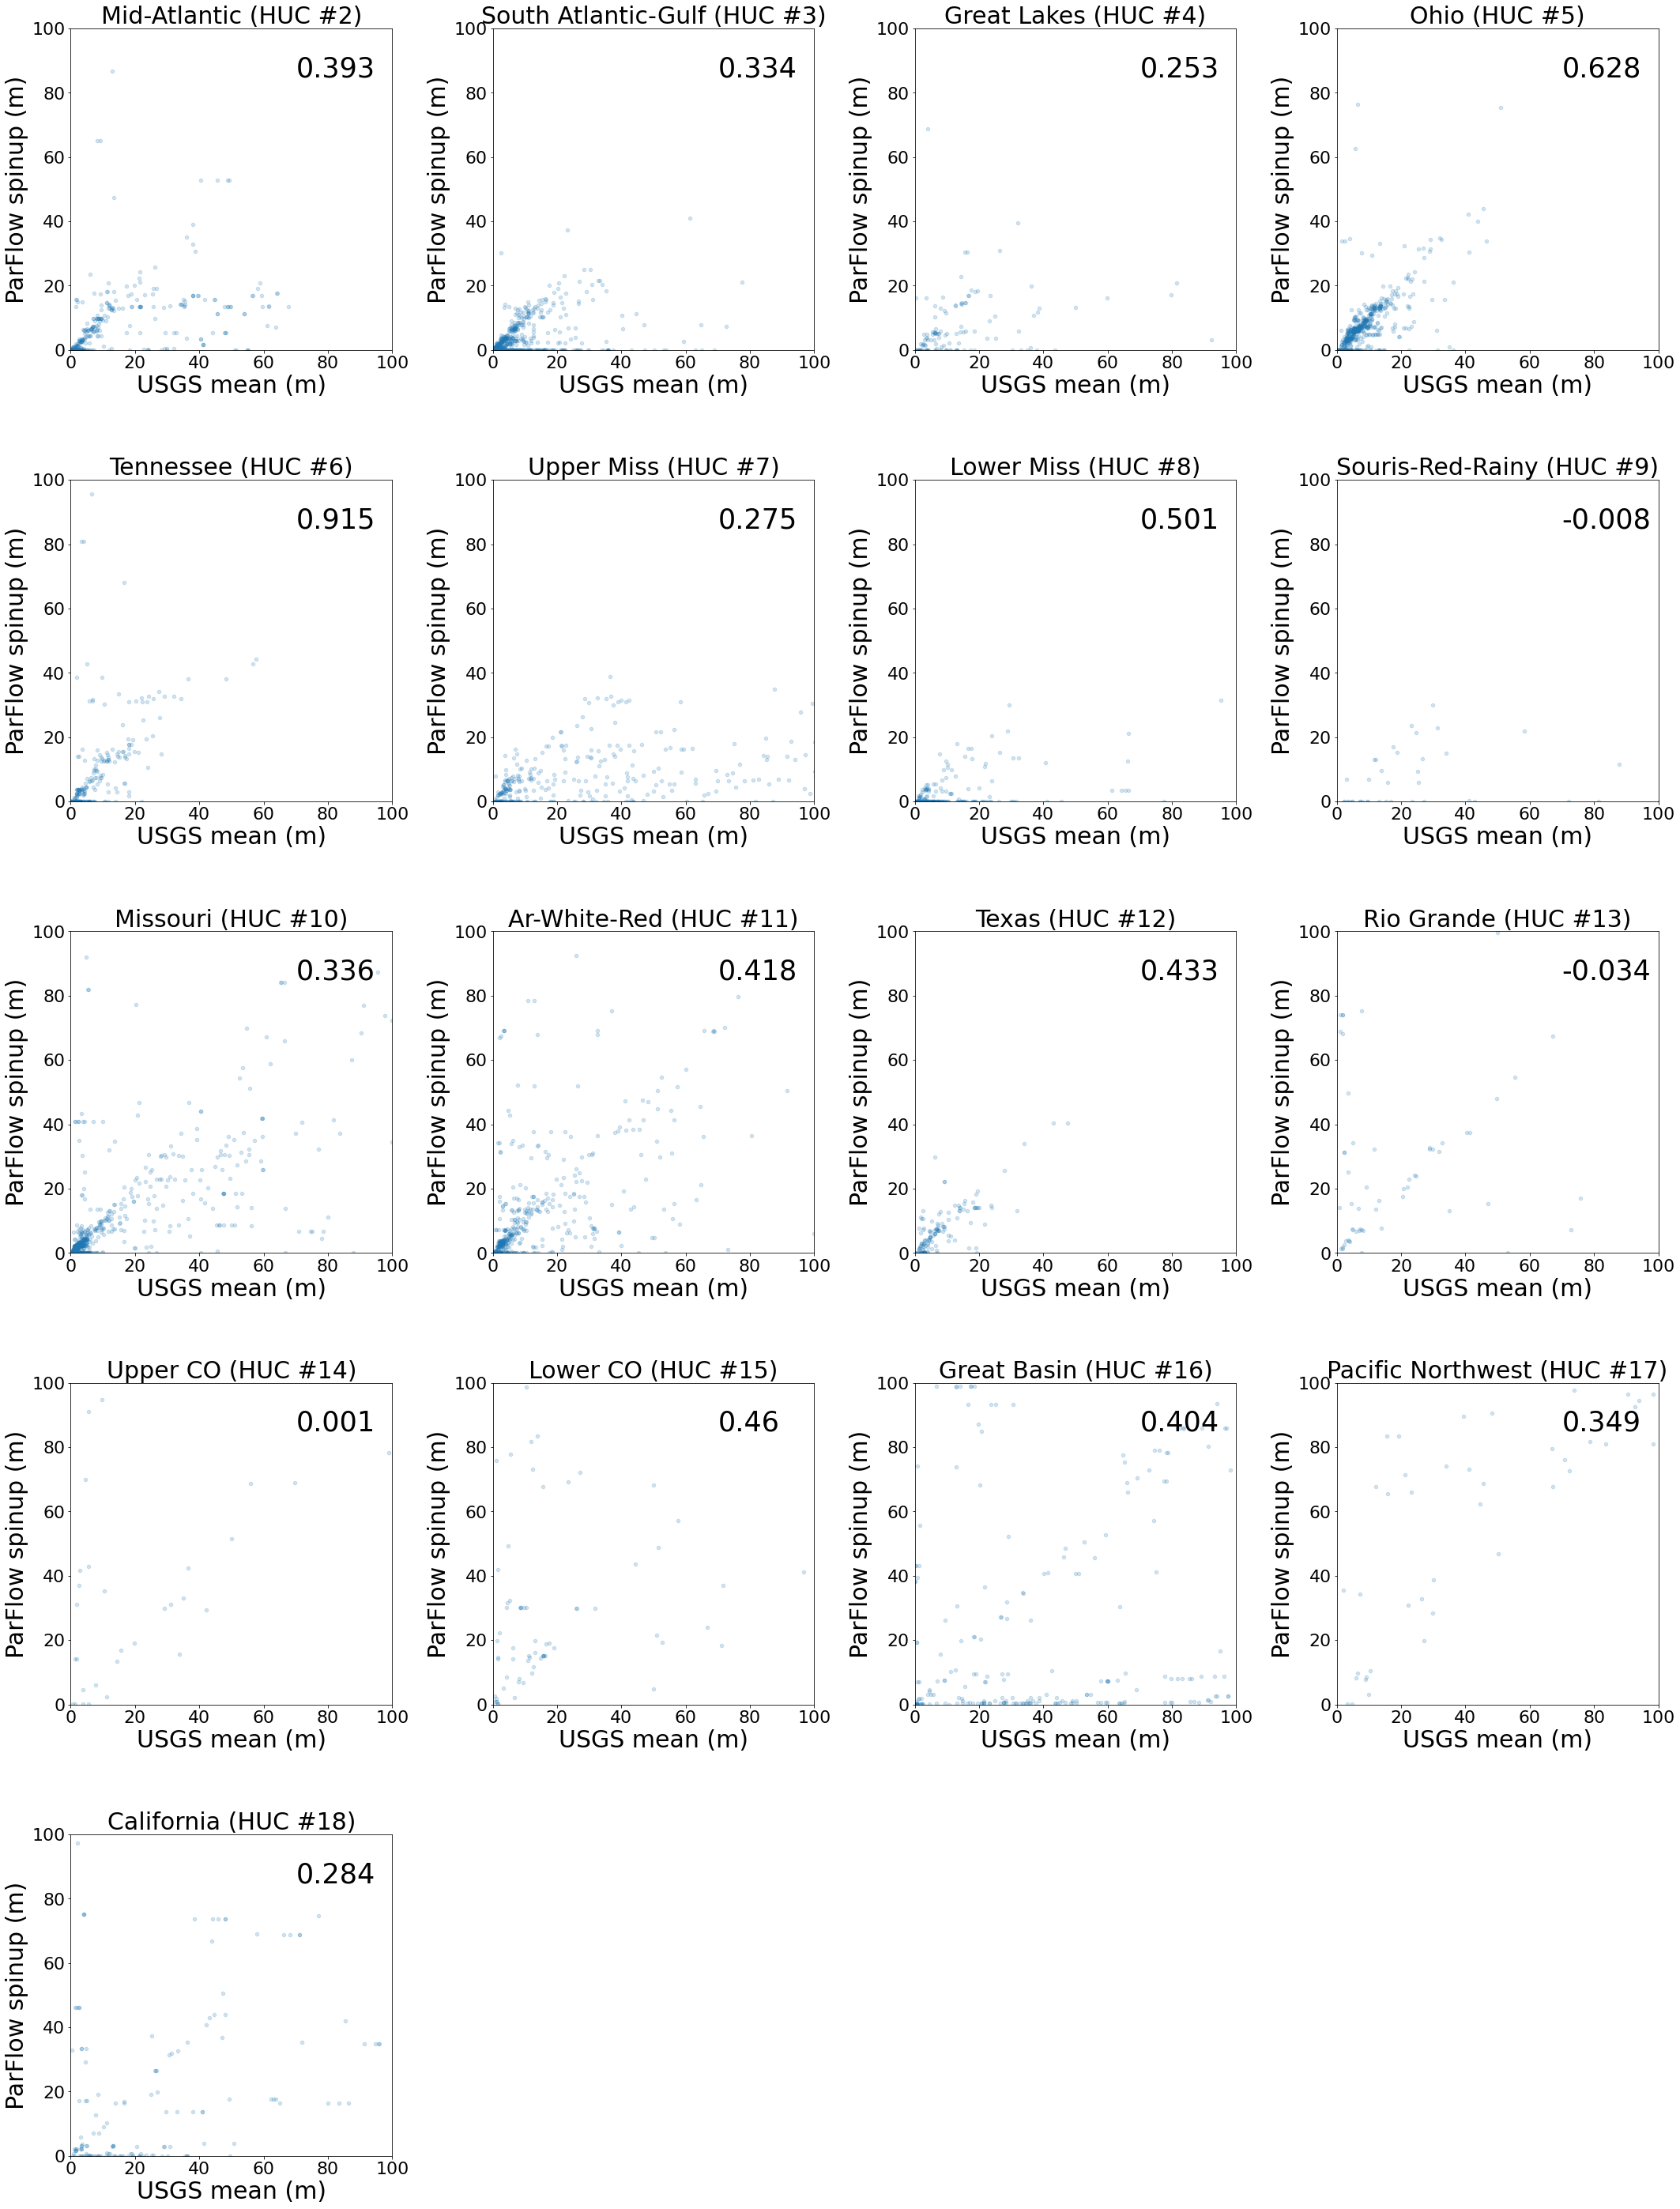

In [61]:
groups = sel_point_df1.groupby('OBJECTID')

ncol = 4
fig, axs = plt.subplots((len(groups) // ncol)+1, ncol, figsize=(30,40))

for ii,(name, group) in enumerate(groups):
    group = group.dropna()
    ax = axs[ii//ncol, ii%ncol]
    tmp_obs = group.obs_wtd
    tmp_sim = group.spinup_wtd
    tmp_corr = np.corrcoef(tmp_obs,tmp_sim)[0,1]
    ax.scatter(tmp_obs, tmp_sim,s=20, alpha=0.2)
    ax.text(0.7,0.85,str(np.round(tmp_corr,3)),fontsize=35, transform=ax.transAxes)
    ax.set_ylim(0,100)
    ax.set_xlabel('USGS mean (m)', fontsize=30)
    ax.set_ylabel('ParFlow spinup (m)', fontsize=30)
    ax.set_xlim(0,100)
    ax.set_title(huc_2_names[name]+' (HUC #'+str(int(name))+')', fontsize=30)
    ax.set(adjustable='box', aspect='equal')

plt.tight_layout()
fig.delaxes(axs[4][1])
fig.delaxes(axs[4][2])
fig.delaxes(axs[4][3])
plt.savefig('all_seepage_scatter_USGS.png', dpi=300)

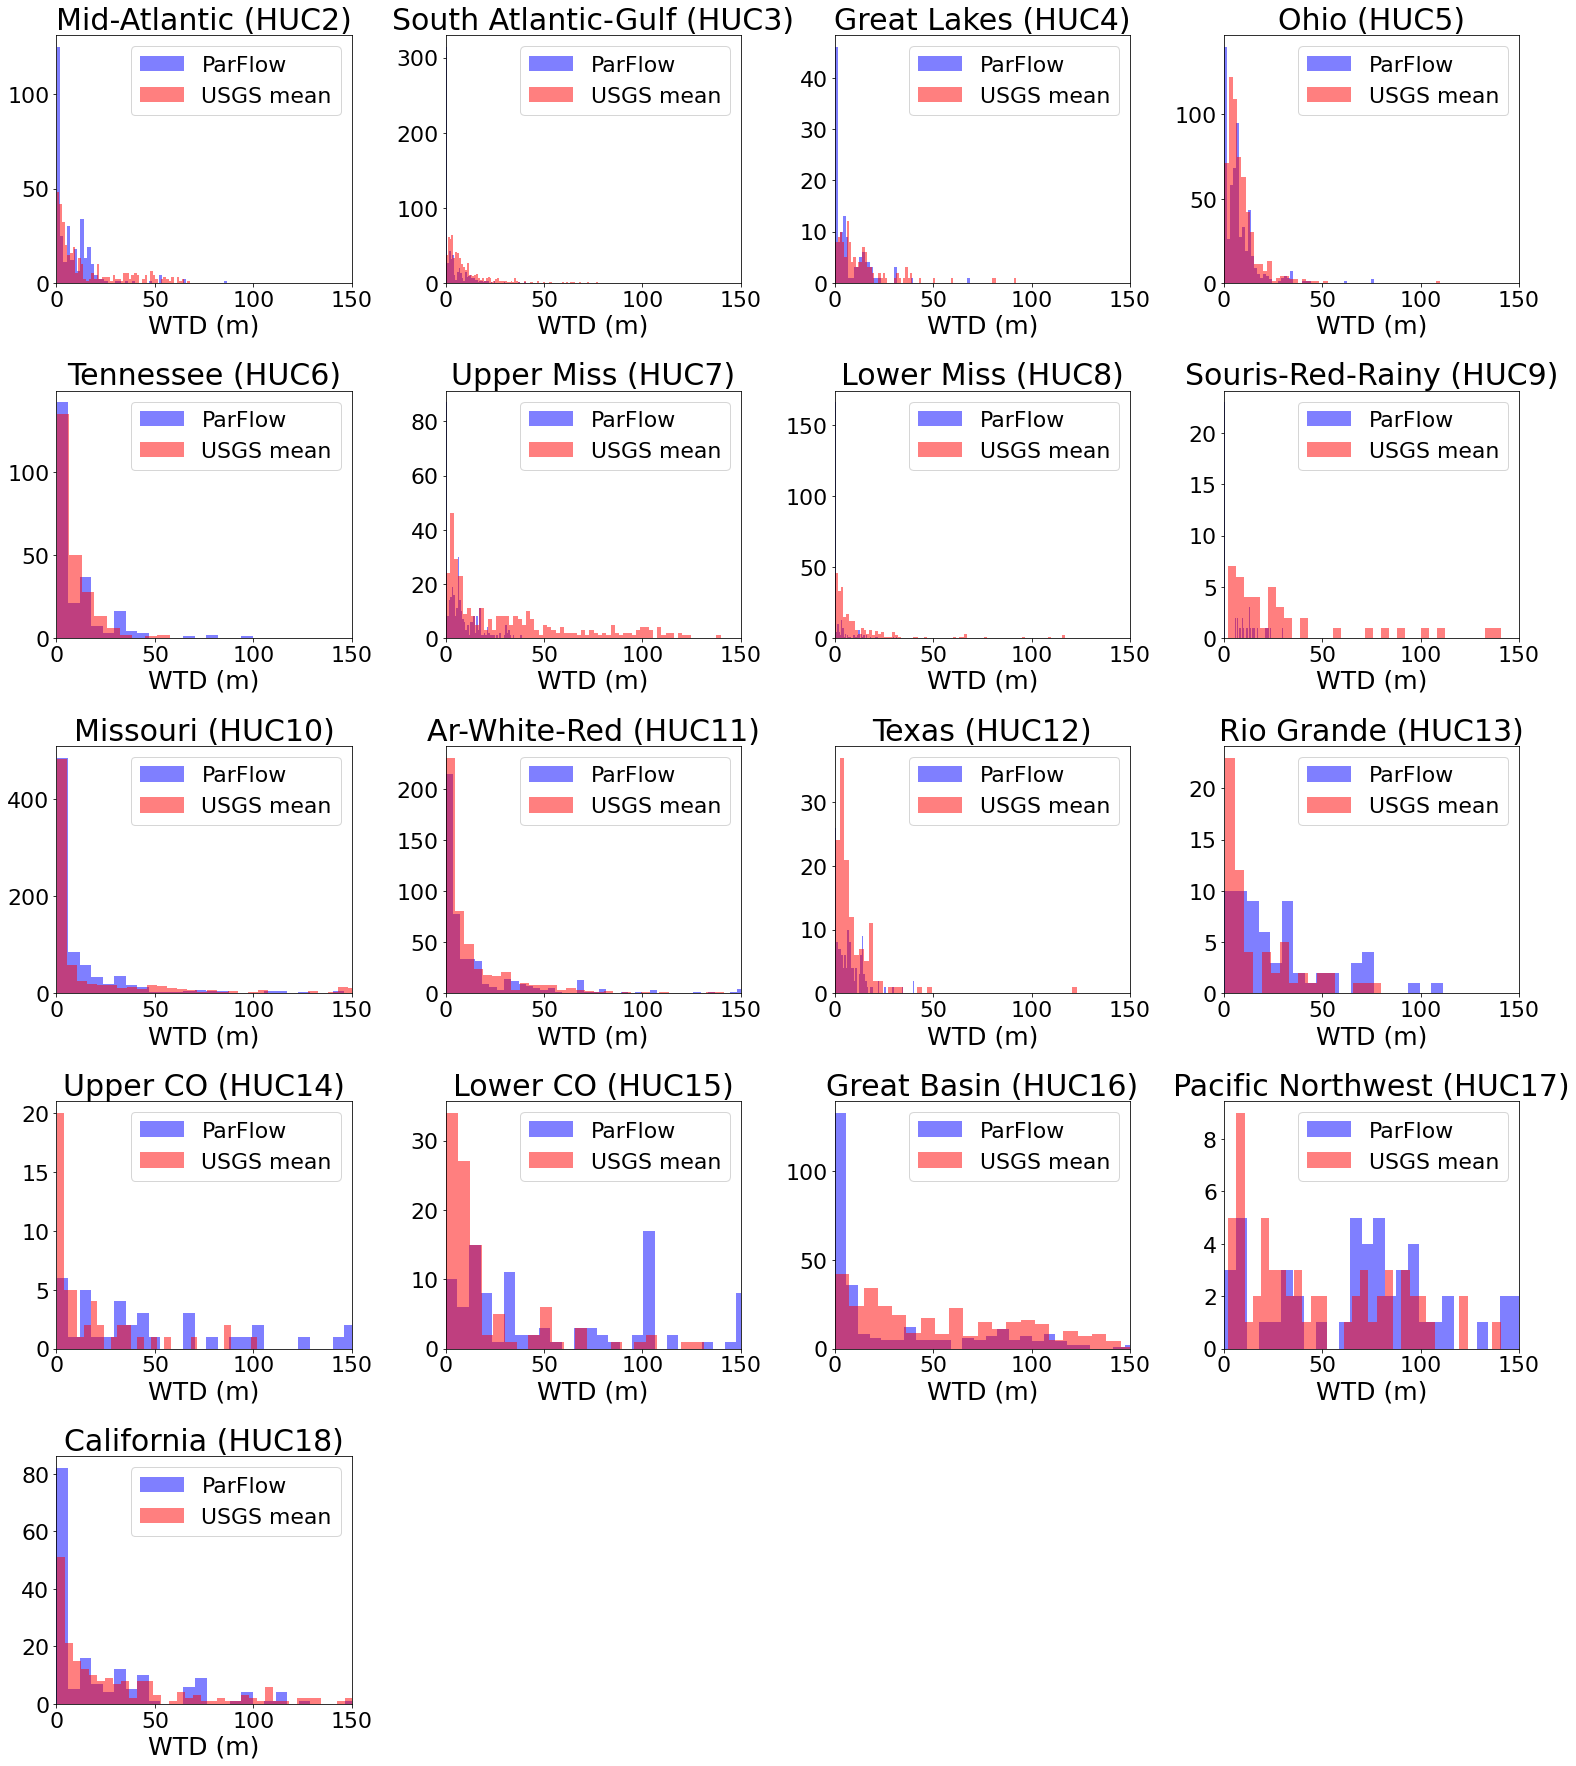

In [62]:
groups = sel_point_df1.groupby('OBJECTID')

ncol = 4
fig, axs = plt.subplots((len(groups) // ncol)+1, ncol, figsize=(22,25))

for ii,(name, group) in enumerate(groups):
    group = group.dropna()
    ax = axs[ii//ncol, ii%ncol]
    tmp_obs = group.obs_wtd
    tmp_sim = group.spinup_wtd
    ax.hist(tmp_sim, bins = 50, color='b',alpha=0.5, label='ParFlow')
    if ii in [1,2,5,6,7]:
        ax.hist(tmp_obs, bins=80, color='r',alpha=0.5, label='USGS mean')
    else:
        ax.hist(tmp_obs, bins=50, color='r',alpha=0.5, label='USGS mean')
    ax.legend(loc='upper right')
    ax.set_xlim(0, 150)
    ax.set_xlabel('WTD (m)', fontsize=25)
    ax.set_title(huc_2_names[name]+' (HUC'+str(int(name))+')', fontsize=30)

plt.tight_layout()
fig.delaxes(axs[4][1])
fig.delaxes(axs[4][2])
fig.delaxes(axs[4][3])
plt.savefig('all_seepage_histogram_USGS.png', dpi=300)


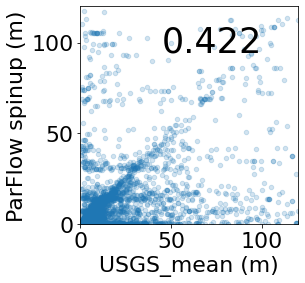

In [63]:
sel_point_df1 = sel_point_df1.dropna()

tmp_corr = np.corrcoef(sel_point_df1.obs_wtd,sel_point_df1.spinup_wtd)[0,1]
plt.text(45,95,str(np.round(tmp_corr,3)),fontsize=35)
plt.scatter(sel_point_df1.obs_wtd,sel_point_df1.spinup_wtd,s=20, alpha=0.2)
plt.ylim(0,120)
plt.ylabel('ParFlow spinup (m)')
plt.xlim(0,120)
plt.xlabel('USGS_mean (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('all_seepage_scatter_domain_USGS.png', dpi=300)


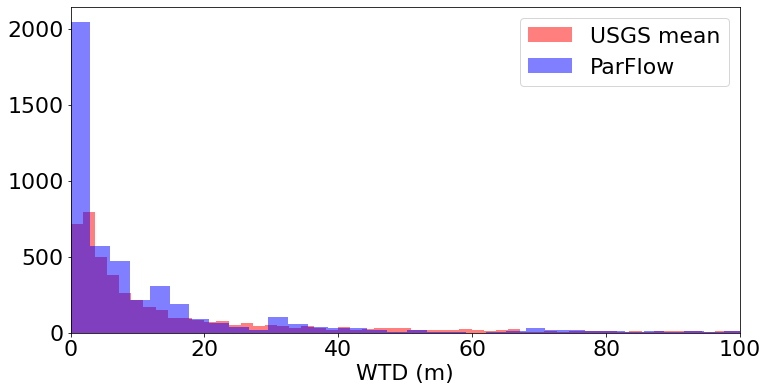

In [64]:
plt.figure(figsize=(12,6))
plt.hist(sel_point_df1.obs_wtd, bins = 200, color='r',alpha=0.5, label='USGS mean')
plt.hist(sel_point_df1.spinup_wtd, bins = 100, color='b',alpha=0.5, label='ParFlow')
plt.xlabel('WTD (m)')
plt.legend()
plt.xlim(0,100)
plt.savefig('all_seepage_histogram_domain_USGS.png', dpi=300)

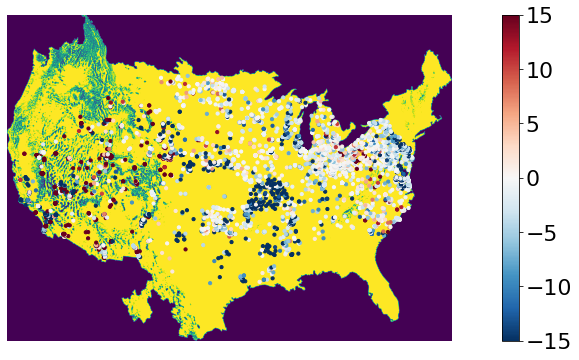

In [66]:
plt.figure(figsize=(18,6))
plt.imshow(press_arr>0)
plt.scatter(sel_point_df1.x, 3256 - sel_point_df1.y, 
            c = (sel_point_df1.spinup_wtd - sel_point_df1.obs_wtd),
            s = 10,
            vmin=-15, vmax = 15, cmap='RdBu_r')
plt.colorbar()
plt.axis('off')
plt.savefig('all_seepage_diff_USGS.png', dpi=500)